In [4]:
import pandas as pd
dataset = pd.read_csv("/Users/srimanthdhondy/Programs/Projects/ArogoAI_task/AI ML Internship Training Data.xlsx - freight_delivery_realistic_data.csv")

In [5]:
dataset

,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed
0,SHIP000000,Jaipur,Mumbai,2023-04-26,2023-05-01,2023-05-02,Trailer,1603,Rain,Light,Yes
1,SHIP000001,Bangalore,Delhi,2023-02-09,2023-02-13,2023-02-17,Trailer,1237,Storm,Moderate,Yes
2,SHIP000002,Mumbai,Chennai,2023-09-19,2023-09-25,2023-09-25,Truck,1863,Clear,Light,No
3,SHIP000003,Hyderabad,Ahmedabad,2023-04-01,2023-04-05,2023-04-05,Container,1374,Clear,Light,No
4,SHIP000004,Chennai,Kolkata,2023-11-24,2023-11-26,2023-11-28,Container,676,Clear,Heavy,Yes
...,...,...,...,...,...,...,...,...,...,...,...
19995,SHIP019995,Chennai,Bangalore,2023-06-22,2023-06-23,2023-06-26,Truck,564,Fog,Moderate,Yes
19996,SHIP019996,Hyderabad,Jaipur,2023-03-02,2023-03-03,2023-03-07,Truck,305,Storm,Moderate,Yes
19997,SHIP019997,Hyderabad,Mumbai,2023-05-24,2023-05-27,2023-06-02,Trailer,1028,Rain,Moderate,Yes
19998,SHIP019998,Ahmedabad,Chennai,2023-05-02,2023-05-05,2023-05-08,Lorry,905,Fog,Moderate,Yes


In [6]:
print(dataset[dataset["Delayed"] == 'Yes'].count())

Shipment ID              14757
Origin                   14757
Destination              14757
Shipment Date            14757
Planned Delivery Date    14757
Actual Delivery Date     14757
Vehicle Type             14319
Distance (km)            14757
Weather Conditions       14757
Traffic Conditions       14757
Delayed                  14757
dtype: int64


In [7]:
print(dataset[dataset["Delayed"] == "No"].count())

Shipment ID              5243
Origin                   5243
Destination              5243
Shipment Date            5243
Planned Delivery Date    5243
Actual Delivery Date     5243
Vehicle Type             5084
Distance (km)            5243
Weather Conditions       5243
Traffic Conditions       5243
Delayed                  5243
dtype: int64


In [8]:
# Filter rows where 'Delayed' is 'Yes' and 'Vehicle Type' is null
delayed_yes_null_vehicle = dataset[(dataset["Delayed"] == "Yes") & (dataset["Vehicle Type"].isnull())]

# Count the number of such rows
null_vehicle_count = delayed_yes_null_vehicle.shape[0]

print(f"Number of rows with 'Delayed' as 'Yes' and 'Vehicle Type' as null: {null_vehicle_count}")

Number of rows with 'Delayed' as 'Yes' and 'Vehicle Type' as null: 438


In [9]:
# Filter out the rows where "Delayed" is 'Yes' and drop 9514 of them randomly
dataset = dataset[~((dataset["Delayed"] == 'Yes') & (dataset.index.isin(dataset[dataset["Delayed"] == 'Yes'].sample(n=9514, random_state=42).index)))]

In [10]:
dataset

,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed
1,SHIP000001,Bangalore,Delhi,2023-02-09,2023-02-13,2023-02-17,Trailer,1237,Storm,Moderate,Yes
2,SHIP000002,Mumbai,Chennai,2023-09-19,2023-09-25,2023-09-25,Truck,1863,Clear,Light,No
3,SHIP000003,Hyderabad,Ahmedabad,2023-04-01,2023-04-05,2023-04-05,Container,1374,Clear,Light,No
4,SHIP000004,Chennai,Kolkata,2023-11-24,2023-11-26,2023-11-28,Container,676,Clear,Heavy,Yes
6,SHIP000006,Bangalore,Lucknow,2024-05-28,2024-06-03,2024-06-10,Lorry,1988,Fog,Light,Yes
...,...,...,...,...,...,...,...,...,...,...,...
19991,SHIP019991,Bangalore,Delhi,2023-05-31,2023-06-04,2023-06-04,Truck,1261,Clear,Light,No
19993,SHIP019993,Delhi,Pune,2024-01-06,2024-01-07,2024-01-09,Trailer,385,Rain,Moderate,Yes
19995,SHIP019995,Chennai,Bangalore,2023-06-22,2023-06-23,2023-06-26,Truck,564,Fog,Moderate,Yes
19996,SHIP019996,Hyderabad,Jaipur,2023-03-02,2023-03-03,2023-03-07,Truck,305,Storm,Moderate,Yes


In [11]:
dataset = dataset.dropna(axis=0)

In [12]:
dataset['Planned Duration'] = (
    pd.to_datetime(dataset['Planned Delivery Date']) - pd.to_datetime(dataset['Shipment Date'])
).dt.days

#dataset['Delay Duration'] = (
#    pd.to_datetime(dataset['Actual Delivery Date']) - pd.to_datetime(dataset['Planned Delivery Date'])
#).dt.days

/var/folders/3y/3y2j958n5mz9_rx5c56ffm5r0000gn/T/ipykernel_16838/769602776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Planned Duration'] = (


In [13]:
dataset = dataset.drop(['Shipment ID', 'Shipment Date', 'Planned Delivery Date', 'Actual Delivery Date'], axis=1)
dataset

,Origin,Destination,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed,Planned Duration
1,Bangalore,Delhi,Trailer,1237,Storm,Moderate,Yes,4
2,Mumbai,Chennai,Truck,1863,Clear,Light,No,6
3,Hyderabad,Ahmedabad,Container,1374,Clear,Light,No,4
4,Chennai,Kolkata,Container,676,Clear,Heavy,Yes,2
6,Bangalore,Lucknow,Lorry,1988,Fog,Light,Yes,6
...,...,...,...,...,...,...,...,...
19991,Bangalore,Delhi,Truck,1261,Clear,Light,No,4
19993,Delhi,Pune,Trailer,385,Rain,Moderate,Yes,1
19995,Chennai,Bangalore,Truck,564,Fog,Moderate,Yes,1
19996,Hyderabad,Jaipur,Truck,305,Storm,Moderate,Yes,1


In [21]:
import joblib
from sklearn.preprocessing import LabelEncoder

# Assume you have the following LabelEncoders
label_encoders = {}

for col in ['Weather Conditions', 'Traffic Conditions', 'Vehicle Type', 'Origin', 'Destination', "Delayed"]:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le

# Save each LabelEncoder
joblib.dump(label_encoders, "/Users/srimanthdhondy/Programs/Projects/ArogoAI_task/label_encoders_without_actual_delivery_date.pkl")

['/Users/srimanthdhondy/Programs/Projects/ArogoAI_task/label_encoders_without_actual_delivery_date.pkl']

In [22]:
dataset

,Origin,Destination,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed,Planned Duration
1,1,3,2,1237,3,2,1,4
2,8,2,3,1863,0,1,0,6
3,4,0,0,1374,0,1,0,4
4,2,6,0,676,0,0,1,2
6,1,7,1,1988,1,1,1,6
...,...,...,...,...,...,...,...,...
19991,1,3,3,1261,0,1,0,4
19993,3,9,2,385,2,2,1,1
19995,2,1,3,564,1,2,1,1
19996,4,5,3,305,3,2,1,1


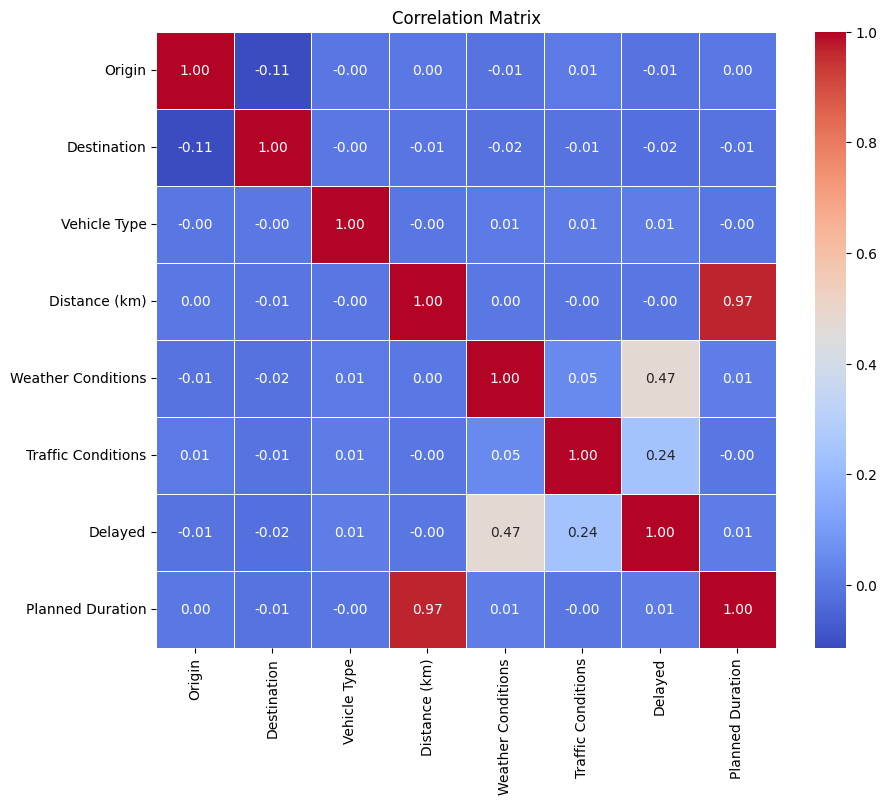

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the dataset into a DataFrame
df = pd.DataFrame(dataset)

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [18]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Step 2: Load and preprocess the raw_data
# Replace 'your_raw_dataset.csv' with your actual raw_dataset path
#raw_data = pd.read_csv('your_raw_dataset.csv')

# Assuming 'target' is the column name for the label
X = dataset.drop('Delayed', axis=1)
y = dataset['Delayed']

# Encode the target variable (Yes -> 1, No -> 0)
y = LabelEncoder().fit_transform(y)

# Standardize the features for better performance
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

# Step 3: Split the raw_data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Perform cross-validation during training
model = LogisticRegression(max_iter=2500,solver="liblinear")
cv_scores = cross_val_score(model, X_train, y_train, cv=35, scoring='accuracy')  # 5-fold cross-validation

# Print cross-validation scores
print("Cross-Validation Accuracy Scores:", cv_scores)
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")

# Train the model on the full training set
model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Print evaluation metrics
print(f"\nTest Set Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Optional: Display classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Cross-Validation Accuracy Scores: [0.87745098 0.8627451  0.85784314 0.88235294 0.85294118 0.83823529
 0.87745098 0.88235294 0.8627451  0.85294118 0.89705882 0.88235294
 0.83823529 0.85294118 0.86764706 0.85784314 0.85784314 0.90640394
 0.8817734  0.85714286 0.89162562 0.86699507 0.86699507 0.89162562
 0.8817734  0.86206897 0.8817734  0.89655172 0.8817734  0.87684729
 0.85714286 0.86699507 0.85714286 0.8817734  0.84236453]
Mean Cross-Validation Accuracy: 0.8700

Test Set Metrics:
Accuracy: 0.8788
Precision: 1.0000
Recall: 0.7535
F1 Score: 0.8594

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      1552
           1       1.00      0.75      0.86      1501

    accuracy                           0.88      3053
   macro avg       0.90      0.88      0.88      3053
weighted avg       0.90      0.88      0.88      3053


Confusion Matrix:
 [[1552    0]
 [ 370 1131]]


In [20]:
import joblib  # Library for saving and loading models

# Step 7: Save the trained model
model_path = "/Users/srimanthdhondy/Programs/Projects/ArogoAI_task/second_logistic_regression_model_dropped_actual_delivery_dates.joblib"
joblib.dump(model, model_path)
print(f"Model saved to {model_path}")

Model saved to /Users/srimanthdhondy/Programs/Projects/ArogoAI_task/second_logistic_regression_model_dropped_actual_delivery_dates.joblib
